# Problem Statement :  

## 1. Load a historical dataset from previous loan applications
## 2. Clean the data
## 3. Apply different classification algorithm on the data.

## 4. The results is reported as the accuracy of each classifier, using the following metrics when these are applicable:
### Jaccard index
### F1-score
### LogLoss


# Solution : 

### The data from loan_train.csv and loan_test.csv will be used as train data and test data and classifiers will be prepared and trained using train data and then metrics will be captured using the test data. All metrics are captured and a summary report is displayed at the end.

## Setup Environment 


In [142]:
# Setting up
import itertools
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import NullFormatter
import pandas as pd
import numpy as np
import matplotlib.ticker as ticker
from sklearn import preprocessing
%matplotlib inline

## 1. Load a historical dataset from previous loan applications
### Data for model training is available as loan_train.csv and for model testing is available as loan_test.csv

In [143]:
# Fetch the Loan data from the csv files.
# The dataset includes details of 346 customers whose loan are already paid off or defaulted. 
# Fields in DataSet:

# Field                                                  Description
# ----------------------------------------------------------------------------------------------
# 1. Loan_status                              Whether a loan is paid off on in collection
# 2. Principal                                Basic principal loan amount at the
# 3. Terms                                    Origination terms which can be weekly (7 days), biweekly, and monthly payoff schedule
# 4. Effective_date                           When the loan got originated and took effects
# 5. Due_date                                 Since it’s one-time payoff schedule, each loan has one single due date
# 6. Age                                      Age of applicant
# 7. Education                                Education of applicant
# 8. Gender                                   The gender of applicant

In [144]:
# Train Data
!wget -O loan_train.csv https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/ML0101ENv3/labs/loan_train.csv

--2020-12-16 08:43:31--  https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/ML0101ENv3/labs/loan_train.csv
Resolving s3-api.us-geo.objectstorage.softlayer.net (s3-api.us-geo.objectstorage.softlayer.net)... 67.228.254.196
Connecting to s3-api.us-geo.objectstorage.softlayer.net (s3-api.us-geo.objectstorage.softlayer.net)|67.228.254.196|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 23101 (23K) [text/csv]
Saving to: ‘loan_train.csv’

loan_train.csv      100%[===================>]  22.56K  --.-KB/s    in 0.002s  

2020-12-16 08:43:31 (13.7 MB/s) - ‘loan_train.csv’ saved [23101/23101]



In [145]:
# Test Data
!wget -O loan_test.csv https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/ML0101ENv3/labs/loan_test.csv

--2020-12-16 08:43:32--  https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/ML0101ENv3/labs/loan_test.csv
Resolving s3-api.us-geo.objectstorage.softlayer.net (s3-api.us-geo.objectstorage.softlayer.net)... 67.228.254.196
Connecting to s3-api.us-geo.objectstorage.softlayer.net (s3-api.us-geo.objectstorage.softlayer.net)|67.228.254.196|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 3642 (3.6K) [text/csv]
Saving to: ‘loan_test.csv’

loan_test.csv       100%[===================>]   3.56K  --.-KB/s    in 0s      

2020-12-16 08:43:32 (104 MB/s) - ‘loan_test.csv’ saved [3642/3642]



In [146]:
# Prepare datasets
train_df = pd.read_csv('loan_train.csv')
test_df = pd.read_csv('loan_test.csv')


In [147]:
# check the size of data
print('Train Data Size: ',train_df.shape)
print('Test Data Size: ',test_df.shape)


Train Data Size:  (346, 10)
Test Data Size:  (54, 10)


In [148]:
# We can see some date fields in the dataset, hence we will format them to dates to preserve correct values
train_df['due_date'] = pd.to_datetime(train_df['due_date'])
train_df['effective_date'] = pd.to_datetime(train_df['effective_date'])
print('Train Dataset :')
train_df.head()

Train Dataset :


,Unnamed: 0,Unnamed: 0.1,loan_status,Principal,terms,effective_date,due_date,age,education,Gender
0,0,0,PAIDOFF,1000,30,2016-09-08,2016-10-07,45,High School or Below,male
1,2,2,PAIDOFF,1000,30,2016-09-08,2016-10-07,33,Bechalor,female
2,3,3,PAIDOFF,1000,15,2016-09-08,2016-09-22,27,college,male
3,4,4,PAIDOFF,1000,30,2016-09-09,2016-10-08,28,college,female
4,6,6,PAIDOFF,1000,30,2016-09-09,2016-10-08,29,college,male


In [149]:
# We can see some date fields in the dataset, hence we will format them to dates to preserve correct values
test_df['due_date'] = pd.to_datetime(test_df['due_date'])
test_df['effective_date'] = pd.to_datetime(test_df['effective_date'])
print('Test Dataset :')
test_df.head()

Test Dataset :


,Unnamed: 0,Unnamed: 0.1,loan_status,Principal,terms,effective_date,due_date,age,education,Gender
0,1,1,PAIDOFF,1000,30,2016-09-08,2016-10-07,50,Bechalor,female
1,5,5,PAIDOFF,300,7,2016-09-09,2016-09-15,35,Master or Above,male
2,21,21,PAIDOFF,1000,30,2016-09-10,2016-10-09,43,High School or Below,female
3,24,24,PAIDOFF,1000,30,2016-09-10,2016-10-09,26,college,male
4,35,35,PAIDOFF,800,15,2016-09-11,2016-09-25,29,Bechalor,male


## 2. Clean the Data - Data Processing
### We use the train dataset as master data for analysis

In [150]:
# Classification in Data
df= train_df
df['loan_status'].value_counts()

PAIDOFF       260
COLLECTION     86
Name: loan_status, dtype: int64

## Data Visualisation for further analysis

### Loan Status against Principal Amount - Genderwise

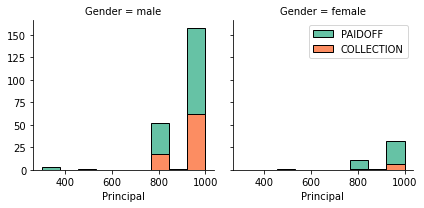

In [151]:
import seaborn as sns

bins = np.linspace(df.Principal.min(), df.Principal.max(), 10)
g = sns.FacetGrid(df, col="Gender", hue="loan_status", palette="Set2", col_wrap=2)
g.map(plt.hist, 'Principal', bins=bins, ec="k")

g.axes[-1].legend()
plt.show()

### Loan Status against Customer Age - Genderwise

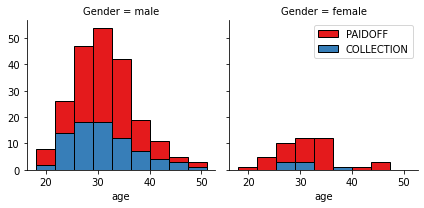

In [152]:
bins = np.linspace(df.age.min(), df.age.max(), 10)
g = sns.FacetGrid(df, col="Gender", hue="loan_status", palette="Set1", col_wrap=2)
g.map(plt.hist, 'age', bins=bins, ec="k")

g.axes[-1].legend()
plt.show()

### Loan paidoff vs day of the week
We see that people who get the loan at the end of the week dont pay it off.

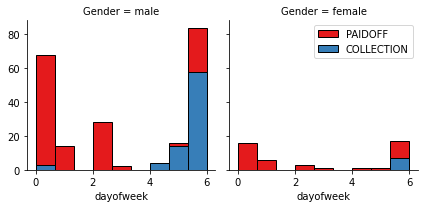

In [153]:
df['dayofweek'] = df['effective_date'].dt.dayofweek
bins = np.linspace(df.dayofweek.min(), df.dayofweek.max(), 10)
g = sns.FacetGrid(df, col="Gender", hue="loan_status", palette="Set1", col_wrap=2)
g.map(plt.hist, 'dayofweek', bins=bins, ec="k")
g.axes[-1].legend()
plt.show()

## Data Pre-processing

## Convert Categorical features to numerical values

In [154]:
train_df['dayofweek'] = train_df['effective_date'].dt.dayofweek

#apply same for test data
test_df['dayofweek'] = test_df['effective_date'].dt.dayofweek

In [155]:
train_df.groupby(['Gender'])['loan_status'].value_counts(normalize=True)

Gender  loan_status
female  PAIDOFF        0.865385
        COLLECTION     0.134615
male    PAIDOFF        0.731293
        COLLECTION     0.268707
Name: loan_status, dtype: float64

In [156]:
test_df.groupby(['Gender'])['loan_status'].value_counts(normalize=True)

Gender  loan_status
female  PAIDOFF        0.727273
        COLLECTION     0.272727
male    PAIDOFF        0.744186
        COLLECTION     0.255814
Name: loan_status, dtype: float64

We need to convert the 'gender' categorial feature to numeric value

In [157]:
# male = 0 and female =1

train_df['Gender'].replace(to_replace=['male','female'], value=[0,1],inplace=True)
train_df.head()

,Unnamed: 0,Unnamed: 0.1,loan_status,Principal,terms,effective_date,due_date,age,education,Gender,dayofweek
0,0,0,PAIDOFF,1000,30,2016-09-08,2016-10-07,45,High School or Below,0,3
1,2,2,PAIDOFF,1000,30,2016-09-08,2016-10-07,33,Bechalor,1,3
2,3,3,PAIDOFF,1000,15,2016-09-08,2016-09-22,27,college,0,3
3,4,4,PAIDOFF,1000,30,2016-09-09,2016-10-08,28,college,1,4
4,6,6,PAIDOFF,1000,30,2016-09-09,2016-10-08,29,college,0,4


In [158]:
# apply same for test data
test_df['Gender'].replace(to_replace=['male','female'], value=[0,1],inplace=True)
test_df.head()

,Unnamed: 0,Unnamed: 0.1,loan_status,Principal,terms,effective_date,due_date,age,education,Gender,dayofweek
0,1,1,PAIDOFF,1000,30,2016-09-08,2016-10-07,50,Bechalor,1,3
1,5,5,PAIDOFF,300,7,2016-09-09,2016-09-15,35,Master or Above,0,4
2,21,21,PAIDOFF,1000,30,2016-09-10,2016-10-09,43,High School or Below,1,5
3,24,24,PAIDOFF,1000,30,2016-09-10,2016-10-09,26,college,0,5
4,35,35,PAIDOFF,800,15,2016-09-11,2016-09-25,29,Bechalor,0,6


In [159]:
train_df['weekend'] = train_df['dayofweek'].apply(lambda x: 1 if (x>3)  else 0)
train_df.head()

,Unnamed: 0,Unnamed: 0.1,loan_status,Principal,terms,effective_date,due_date,age,education,Gender,dayofweek,weekend
0,0,0,PAIDOFF,1000,30,2016-09-08,2016-10-07,45,High School or Below,0,3,0
1,2,2,PAIDOFF,1000,30,2016-09-08,2016-10-07,33,Bechalor,1,3,0
2,3,3,PAIDOFF,1000,15,2016-09-08,2016-09-22,27,college,0,3,0
3,4,4,PAIDOFF,1000,30,2016-09-09,2016-10-08,28,college,1,4,1
4,6,6,PAIDOFF,1000,30,2016-09-09,2016-10-08,29,college,0,4,1


In [160]:
# apply same for test data
test_df['weekend'] = test_df['dayofweek'].apply(lambda x: 1 if (x>3)  else 0)
test_df.head()

,Unnamed: 0,Unnamed: 0.1,loan_status,Principal,terms,effective_date,due_date,age,education,Gender,dayofweek,weekend
0,1,1,PAIDOFF,1000,30,2016-09-08,2016-10-07,50,Bechalor,1,3,0
1,5,5,PAIDOFF,300,7,2016-09-09,2016-09-15,35,Master or Above,0,4,1
2,21,21,PAIDOFF,1000,30,2016-09-10,2016-10-09,43,High School or Below,1,5,1
3,24,24,PAIDOFF,1000,30,2016-09-10,2016-10-09,26,college,0,5,1
4,35,35,PAIDOFF,800,15,2016-09-11,2016-09-25,29,Bechalor,0,6,1


## similarly, one-hot encoding other categorial features 

In [161]:
#Use one hot encoding technique to conver categorical varables to binary variables and append them to the feature Data Frame
Feature = train_df[['Principal','terms','age','Gender','weekend']]
Feature = pd.concat([Feature,pd.get_dummies(train_df['education'])], axis=1)
Feature.drop(['Master or Above'], axis = 1,inplace=True)
Feature.head()

,Principal,terms,age,Gender,weekend,Bechalor,High School or Below,college
0,1000,30,45,0,0,0,1,0
1,1000,30,33,1,0,1,0,0
2,1000,15,27,0,0,0,0,1
3,1000,30,28,1,1,0,0,1
4,1000,30,29,0,1,0,0,1


In [162]:
# apply same for test data
Test_Feature = test_df[['Principal','terms','age','Gender','weekend']]
Test_Feature = pd.concat([Test_Feature,pd.get_dummies(test_df['education'])], axis=1)
Test_Feature.drop(['Master or Above'], axis = 1,inplace=True)
Test_Feature.head()

,Principal,terms,age,Gender,weekend,Bechalor,High School or Below,college
0,1000,30,50,1,0,1,0,0
1,300,7,35,0,1,0,0,0
2,1000,30,43,1,1,0,1,0
3,1000,30,26,0,1,0,0,1
4,800,15,29,0,1,1,0,0


## Feature Selection X and Y

In [163]:
X_train = Feature
X_train[0:5]

,Principal,terms,age,Gender,weekend,Bechalor,High School or Below,college
0,1000,30,45,0,0,0,1,0
1,1000,30,33,1,0,1,0,0
2,1000,15,27,0,0,0,0,1
3,1000,30,28,1,1,0,0,1
4,1000,30,29,0,1,0,0,1


In [164]:
X_test = Test_Feature
X_test[0:5]

,Principal,terms,age,Gender,weekend,Bechalor,High School or Below,college
0,1000,30,50,1,0,1,0,0
1,300,7,35,0,1,0,0,0
2,1000,30,43,1,1,0,1,0
3,1000,30,26,0,1,0,0,1
4,800,15,29,0,1,1,0,0


In [165]:
# our label Y is loan_status
y_train = pd.get_dummies(train_df['loan_status'])['PAIDOFF'].values
y_train[0:5]


array([1, 1, 1, 1, 1], dtype=uint8)

In [166]:
y_test = pd.get_dummies(test_df['loan_status'])['PAIDOFF'].values
y_test[0:5]

array([1, 1, 1, 1, 1], dtype=uint8)

## Normalize Data
Data Standardization give data zero mean and unit variance (technically should be done after train test split )


In [167]:
X_train= preprocessing.StandardScaler().fit(X_train).transform(X_train)
X_train[0:5]

array([[ 0.51578458,  0.92071769,  2.33152555, -0.42056004, -1.20577805,
        -0.38170062,  1.13639374, -0.86968108],
       [ 0.51578458,  0.92071769,  0.34170148,  2.37778177, -1.20577805,
         2.61985426, -0.87997669, -0.86968108],
       [ 0.51578458, -0.95911111, -0.65321055, -0.42056004, -1.20577805,
        -0.38170062, -0.87997669,  1.14984679],
       [ 0.51578458,  0.92071769, -0.48739188,  2.37778177,  0.82934003,
        -0.38170062, -0.87997669,  1.14984679],
       [ 0.51578458,  0.92071769, -0.3215732 , -0.42056004,  0.82934003,
        -0.38170062, -0.87997669,  1.14984679]])

In [168]:
X_test= preprocessing.StandardScaler().fit(X_test).transform(X_test)
X_test[0:5]

array([[ 0.49362588,  0.92844966,  3.05981865,  1.97714211, -1.30384048,
         2.39791576, -0.79772404, -0.86135677],
       [-3.56269116, -1.70427745,  0.53336288, -0.50578054,  0.76696499,
        -0.41702883, -0.79772404, -0.86135677],
       [ 0.49362588,  0.92844966,  1.88080596,  1.97714211,  0.76696499,
        -0.41702883,  1.25356634, -0.86135677],
       [ 0.49362588,  0.92844966, -0.98251057, -0.50578054,  0.76696499,
        -0.41702883, -0.79772404,  1.16095912],
       [-0.66532184, -0.78854628, -0.47721942, -0.50578054,  0.76696499,
         2.39791576, -0.79772404, -0.86135677]])

## 3. Apply different classification algorithm on the data.

We will use the training set to build an accurate model(s). 
Then use the test set to report the accuracy of the model. 

### We will evaluate the following algorithms:

#### A) K Nearest Neighbor(KNN)
#### B) Decision Tree
#### C) Support Vector Machine
#### D) Logistic Regression

In [169]:
# Setup
from sklearn.metrics import accuracy_score
from sklearn.metrics import jaccard_score
#from sklearn.metrics import jaccard_similarity_score
from sklearn.metrics import f1_score
from sklearn.metrics import log_loss

## A) K Nearest Neighbor(KNN)


### Prepare train and test data


In [170]:
# Split data for model training and model evaluation (testing)

from sklearn.neighbors import KNeighborsClassifier
#from sklearn.model_selection import train_test_split
from sklearn import metrics
#X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.2, random_state=4)

print('Train Data Size' , len(X_train), ' labels ', len(y_train))
print('Test Data Size', len(X_test), ' labels ', len(y_test))


Train Data Size 346  labels  346
Test Data Size 54  labels  54


### Prepare the classifier  and Predict 


In [171]:
mean_acc=np.zeros(50)
std_acc = np.zeros(50)
for n in range(1,51):
    knnmodel=KNeighborsClassifier(n_neighbors=n).fit(X_train,y_train)  
    y_pred=knnmodel.predict(X_test)
    mean_acc[n-1]=metrics.accuracy_score(y_test,y_pred)
    std_acc[n-1]=np.std(y_pred==y_test)/np.sqrt(y_pred.shape[0])

### Announce the results 

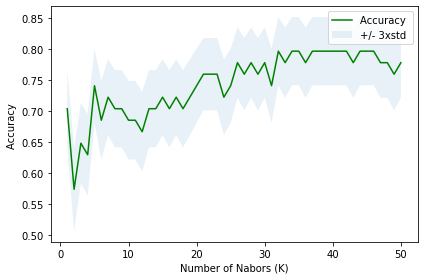

In [172]:
# plot the prediction accuracy
plt.plot(range(1,51),mean_acc,'g')
plt.fill_between(range(1,51),mean_acc - 1 * std_acc,mean_acc + 1 * std_acc, alpha=0.10)
plt.legend(('Accuracy ', '+/- 3xstd'))
plt.ylabel('Accuracy ')
plt.xlabel('Number of Nabors (K)')
plt.tight_layout()
plt.show()

In [173]:
acc_score = mean_acc.max()
k = mean_acc.argmax()+1
print( "The best accuracy is ", round(acc_score,2)*100,'%', "with k=", k)

The best accuracy is  80.0 % with k= 32


In [174]:
#K nearest neighbors
knn_pred = KNeighborsClassifier(n_neighbors=k).fit(X_train,y_train)  
y_pred=knnmodel.predict(X_test)


In [175]:
knn_acc_score = round(accuracy_score(y_pred,y_test)*100,2)
knn_jac_score = round(jaccard_score(y_pred,y_test)*100,2)
knn_F1_score = round(f1_score(y_pred,y_test)*100,2)
knn_log_loss = round(log_loss(y_pred,y_test),2)

print('Accuracy Score : ',knn_acc_score,'%')
print('Jaccard Index Score : ',knn_jac_score,'%')
print('F1-SCORE : ',knn_F1_score,'%')
print('Log Loss Score : ',knn_log_loss)

Accuracy Score :  77.78 %
Jaccard Index Score :  76.92 %
F1-SCORE :  86.96 %
Log Loss Score :  7.68


## Decision Tree

### Prepare the classifier and Predict

In [176]:
from sklearn.tree import DecisionTreeClassifier

In [177]:
dtmodel = DecisionTreeClassifier(criterion="entropy", max_depth = 4)
dtmodel.fit(X_train,y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=4)

In [178]:
y_pred=dtmodel.predict(X_test)

### Announce the results

In [179]:
dt_acc_score = round(accuracy_score(y_pred,y_test)*100,2)
dt_jac_score = round(jaccard_score(y_pred,y_test)*100,2)
dt_F1_score = round(f1_score(y_pred,y_test)*100,2)
dt_log_loss = round(log_loss(y_pred,y_test),2)

print('Accuracy Score : ',dt_acc_score,'%')
print('Jaccard Index Score : ',dt_jac_score,'%')
print('F1-SCORE : ',dt_F1_score,'%')
print('Log Loss Score : ',dt_log_loss)

Accuracy Score :  77.78 %
Jaccard Index Score :  76.47 %
F1-SCORE :  86.67 %
Log Loss Score :  7.68


## C) Support Vector Machine

### Prepare classifier and predict

In [180]:
from sklearn import svm
svmmodel=svm.SVC(kernel='rbf')
svmmodel.fit(X_train,y_train)

SVC()

In [181]:
y_pred=svmmodel.predict(X_test)
#y_pred

### Announce the results

In [182]:
svm_acc_score = round(accuracy_score(y_pred,y_test)*100,2)
svm_jac_score = round(jaccard_score(y_pred,y_test)*100,2)
svm_F1_score = round(f1_score(y_pred,y_test)*100,2)
svm_log_loss = round(log_loss(y_pred,y_test),2)

print('Accuracy Score : ',svm_acc_score,'%')
print('Jaccard Index Score : ',svm_jac_score,'%')
print('F1-SCORE : ',svm_F1_score,'%')
print('Log Loss Score : ',svm_log_loss)

Accuracy Score :  72.22 %
Jaccard Index Score :  72.22 %
F1-SCORE :  83.87 %
Log Loss Score :  9.59


## D) Logistic Regression

### Prepare the classifier and predict

In [183]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
lrmodel=LogisticRegression(C=0.01,solver='liblinear').fit(X_train,y_train)

In [184]:
y_pred=lrmodel.predict(X_test)


### Announce the results

In [185]:
lr_acc_score = round(accuracy_score(y_pred,y_test)*100,2)
lr_jac_score = round(jaccard_score(y_pred,y_test)*100,2)
lr_F1_score = round(f1_score(y_pred,y_test)*100,2)
lr_log_loss = 'NA'

print('Accuracy Score : ',lr_acc_score,'%')
print('Jaccard Index Score : ',lr_jac_score,'%')
print('F1-SCORE : ',lr_F1_score,'%')
print('Log Loss Score : ','NA')

Accuracy Score :  74.07 %
Jaccard Index Score :  74.07 %
F1-SCORE :  85.11 %
Log Loss Score :  NA


## 4. Metrics  - Report

In [186]:
#from IPython.display import display, HTML
Accuracy_score = [knn_acc_score,dt_acc_score,svm_acc_score,lr_acc_score]
Jaccard = [knn_jac_score,dt_jac_score,svm_jac_score,lr_jac_score]
F1_score = [knn_F1_score,dt_F1_score,svm_F1_score,lr_F1_score]
LogLoss = [knn_log_loss,dt_log_loss,svm_log_loss,lr_log_loss]

df = {'Algorithm': ['KNN', 'Decistion Tree', 'SVM', 'LogisticRegression'],'Accuracy Score': Accuracy_score, 'Jaccard': Jaccard, 'F1-score': F1_score, 'LogLoss': LogLoss}

Report = pd.DataFrame(data=df, columns=['Algorithm','Accuracy Score', 'Jaccard', 'F1-score', 'LogLoss'], index=None)
Report



,Algorithm,Accuracy Score,Jaccard,F1-score,LogLoss
0,KNN,77.78,76.92,86.96,7.68
1,Decistion Tree,77.78,76.47,86.67,7.68
2,SVM,72.22,72.22,83.87,9.59
3,LogisticRegression,74.07,74.07,85.11,NA


In [187]:
print('End of Code Submission')

End of Code Submission
